<a href="https://colab.research.google.com/github/akhileshchoudary/bone-fracture-classification/blob/main/Bone_Break_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
# I mount my Google Drive to access the dataset stored in the cloud.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
# I define the path to the dataset directory for easy reference throughout the code.
!ls "/content/drive/My Drive/Bone Break Classification"

'Avulsion fracture'	'Hairline Fracture'	 'Pathological fracture'
'Comminuted fracture'	'Impacted fracture'	 'Spiral Fracture'
'Fracture Dislocation'	'Longitudinal fracture'
'Greenstick fracture'	'Oblique fracture'


In [10]:
data_dir = "/content/drive/My Drive/Bone Break Classification"

#### Importing Libraries

- I import the necessary libraries for data processing, visualization, and building the machine learning model.
- 'os' and 'numpy' are for file handling and numerical operations.
- 'matplotlib.pyplot' is for plotting images.
- 'tensorflow' and 'keras' provide tools for building and training the neural network.
- 'pathlib' is used for handling file paths.

In [50]:
import os
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from keras import (
    backend as K,
    losses,
    optimizers,
    layers,
    models,
    utils,
    callbacks
)

from pathlib import Path

#### Load Training and Validation Data
- I create training and validation datasets from the image directory using TensorFlow's image_dataset_from_directory.
- The dataset is split with 90% for training and 10% for validation.
- Images are resized to 256x256 pixels, and the batch size is set to 64.
- Labels are inferred from folder names, and the seed ensures reproducibility.

In [51]:
train_data = utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="training",
    shuffle=True,
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=40
)

#load the test data
validation_data = utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="validation",
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=42
)

Found 1101 files belonging to 10 classes.
Using 991 files for training.
Found 1101 files belonging to 10 classes.
Using 110 files for validation.


- The output indicates that 1101 files are found across 10 classes.
- Training dataset: 991 files are used.
- Validation dataset: 110 files are used.
- This confirms that the data is successfully loaded and split.

In [52]:
# Inspect the class names from the dataset
class_names = train_data.class_names
print("Class names:", class_names)

Class names: ['Avulsion fracture', 'Comminuted fracture', 'Fracture Dislocation', 'Greenstick fracture', 'Hairline Fracture', 'Impacted fracture', 'Longitudinal fracture', 'Oblique fracture', 'Pathological fracture', 'Spiral Fracture']


In [55]:
# I define a preprocessing function to normalize image pixel values to the range [0, 1].
# This is done by casting images to float32 and dividing by 255.

def preprocess(img):
    img = tf.cast(img, "float32") / 255.0
    return img

# Applying the preprocessing function to both training and validation datasets.

train_dataset = train_data.map(lambda x, y: (preprocess(x), y))
val_dataset = validation_data.map(lambda x, y: (preprocess(x), y))

In [56]:
# I extract images and labels from the training dataset into NumPy arrays.
# This is useful for further processing or visualization.

x_train = []
y_train = []

# Iterating through the training dataset to collect images and labels.
for images, labels in train_dataset:
    #append train data to x_train
    x_train.append(images.numpy())

    #append labels to y_train
    y_train.append(labels.numpy())

# concatenate all the batches to get the full list
x_train = np.concatenate(x_train, axis=0)
y_train = np.concatenate(y_train, axis=0)

In [57]:
# get val data and labels

x_val = []
y_val = []

for images, labels in val_dataset:
    #append train data to x_train
    x_val.append(images.numpy())

    #append labels to y_train
    y_val.append(labels.numpy())

# concatenate all the batches to get the full list
x_val = np.concatenate(x_val, axis=0)
y_val = np.concatenate(y_val, axis=0)

In [58]:
# defining a function to extract a single batch from a dataset. This is useful for sampling and visualizing a subset of the data.

def sample_batch(data):
    batch = data.take(1).get_single_element()
    if isinstance(batch, tuple):
        batch = batch[0]
    return batch.numpy()

In [61]:
# created a dictionary to map integer labels to their corresponding class names. This will be used for labeling images during visualization.
class_names_dict = {
    0: 'Avulsion fracture',
    1: 'Comminuted fracture',
    2: 'Fracture Dislocation',
    3: 'Greenstick fracture',
    4: 'Hairline Fracture',
    5: 'Impacted fracture',
    6: 'Longitudinal fracture',
    7: 'Oblique fracture',
    8: 'Pathological fracture',
    9: 'Spiral Fracture'
}

In [60]:
# function to display images

def display(images, n=10, size=(15,5), cmap="gray_r", as_type="float32"):
    indices = np.random.choice(len(images), n)

    num_images_per_row = 4

    num_rows = (n + num_images_per_row - 1) // num_images_per_row

    # Set up the subplots
    fig, axes = plt.subplots(num_rows, num_images_per_row, figsize=size)

    #plt.figure(figsize=size)
    for i, index in enumerate(indices):
        #plt.subplot(1, n, i+1)

        label_index = y_train[index]

        # Convert integer label to class name
        class_name = class_names_dict.get(label_index, f'Unknown Class {label_index}')

          # Calculate the position of the subplot in the grid
        row = i // num_images_per_row
        col = i % num_images_per_row

        axes[row, col].imshow(images[index].astype(as_type), cmap=cmap)
        axes[row, col].set_title(f'Class: {label_index}')
        axes[row, col].axis('off')

    plt.subplots_adjust(wspace=0.5, hspace=0.5)

    plt.show()

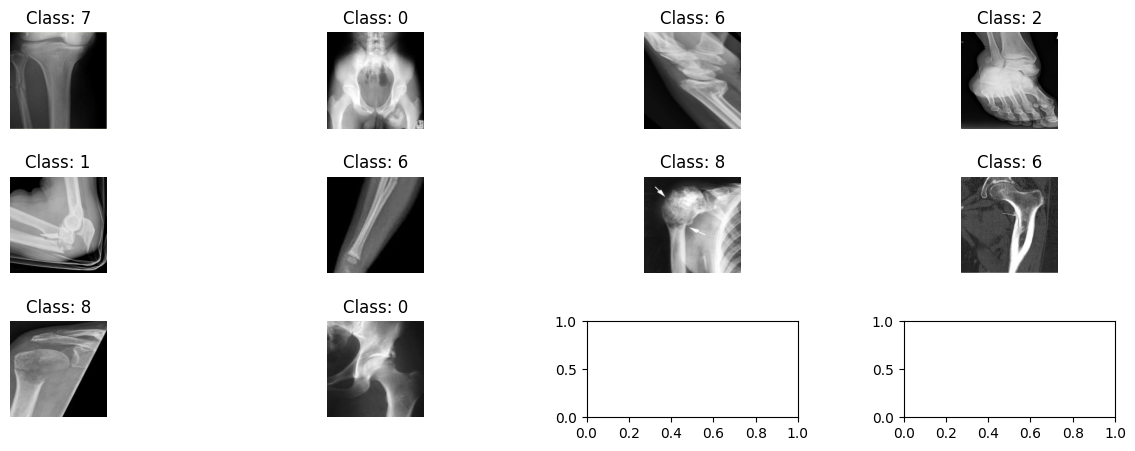

In [62]:
# display sample train images

sample_images = x_train[:100]

display(sample_images)